## Loading Libraries

In [22]:
# install.packages('tidyverse')
# library(tidyverse)

In [2]:
data <- read.csv("heart.csv")
head(data)

ï..age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal
1 63     1   3  145      233  1   0       150     0     2.3     0     0  1   
2 37     1   2  130      250  0   1       187     0     3.5     0     0  2   
3 41     0   1  130      204  0   0       172     0     1.4     2     0  2   
4 56     1   1  120      236  0   1       178     0     0.8     2     0  2   
5 57     0   0  120      354  0   1       163     1     0.6     2     0  2   
6 57     1   0  140      192  0   1       148     0     0.4     1     0  1   
  target
1 1     
2 1     
3 1     
4 1     
5 1     
6 1

In [3]:
tail(data)

ï..age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal
298 59     1   0  164      176  1   0        90     0     1.0     1     2  1   
299 57     0   0  140      241  0   1       123     1     0.2     1     0  3   
300 45     1   3  110      264  0   1       132     0     1.2     1     0  3   
301 68     1   0  144      193  1   1       141     0     3.4     1     2  3   
302 57     1   0  130      131  0   1       115     1     1.2     1     1  3   
303 57     0   1  130      236  0   0       174     0     0.0     1     1  2   
    target
298 0     
299 0     
300 0     
301 0     
302 0     
303 0

In [4]:
glimpse(data)

Rows: 303
Columns: 14
$ ï..age   <int> 63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64, 58, 5~
$ sex      <int> 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1~
$ cp       <int> 3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 2, 2, 3, 0, 3, 0~
$ trestbps <int> 145, 130, 130, 120, 120, 140, 140, 120, 172, 150, 140, 130, 1~
$ chol     <int> 233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 2~
$ fbs      <int> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0~
$ restecg  <int> 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1~
$ thalach  <int> 150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 1~
$ exang    <int> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0~
$ oldpeak  <dbl> 2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, 1.6, 1.2, 0.2, 0~
$ slope    <int> 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1~
$ ca       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0~
$ thal     <int> 1

In [5]:
ncol(data)

[1] 14

In [6]:
nrow(data)

[1] 303

In [7]:
colnames(data)

[1] "ï..age"   "sex"      "cp"       "trestbps" "chol"     "fbs"     
 [7] "restecg"  "thalach"  "exang"    "oldpeak"  "slope"    "ca"      
[13] "thal"     "target"

In [8]:
summary(data)

     ï..age           sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope             ca        
 Mi

## Data Transformation

In [9]:
data2 <- data %>%
  mutate(sex = if_else(sex == 1, "MALE", "FEMALE"),
         fbs = if_else(fbs == 1, ">120", "<=120"),
         exang = if_else(exang == 1, "YES" ,"NO"),
         cp = if_else(cp == 1, "ATYPICAL ANGINA",
                      if_else(cp == 2, "NON-ANGINAL PAIN", "ASYMPTOMATIC")),
         restecg = if_else(restecg == 0, "NORMAL",
                           if_else(restecg == 1, "ABNORMALITY", "PROBABLE OR DEFINITE")),
         slope = as.factor(slope),
         ca = as.factor(ca),
         thal = as.factor(thal),
         target = if_else(target == 1, "YES", "NO")
         ) %>% 
  mutate_if(is.character, as.factor) %>% 
  dplyr::select(target, sex, fbs, exang, cp, restecg, slope, ca, thal, everything())


## Data Visualization

In [10]:
library(repr)
#change the size of the plot

options(repr.plot.width =6, repr.plot.height =3)

Warning message:
"Use of `data2$target` is discouraged. Use `target` instead."
Warning message:
"Use of `data2$target` is discouraged. Use `target` instead."


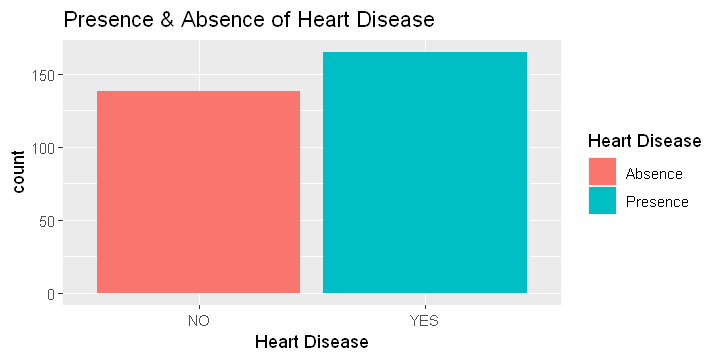

In [11]:
# Bar Plot for target (heart disease)

ggplot(data2, aes(x=data2$target, fill=data2$target))+
   geom_bar()+
   xlab("Heart Disease")+
   ylab("count")+
   ggtitle("Presence & Absence of Heart Disease")+
   scale_fill_discrete(name= 'Heart Disease', labels =c("Absence", "Presence"))

In [12]:
prop.table(table(data2$target))


       NO       YES 
0.4554455 0.5445545 

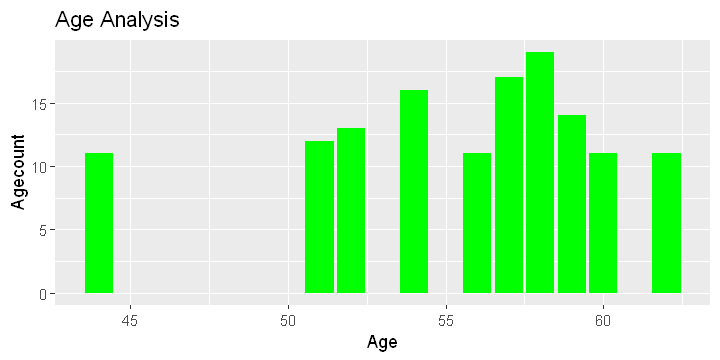

In [13]:
# count the frequency of the values of age

data2 %>%
  group_by(ï..age) %>%
  count() %>%
  filter(n>10) %>%
  ggplot()+
  geom_col(aes(ï..age, n), fill = 'green')+
  ggtitle("Age Analysis")+
  xlab("Age")+
  ylab("Agecount")

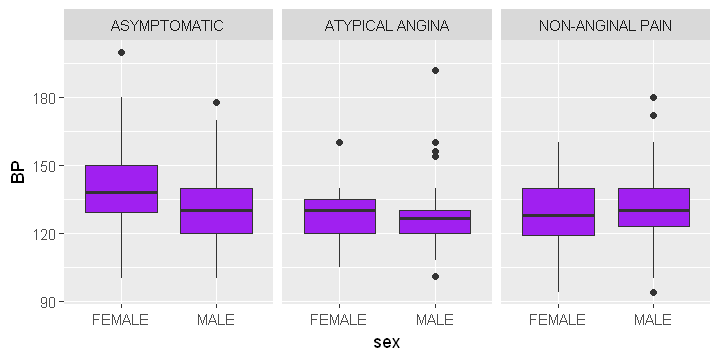

In [14]:
# comapre blood pressure across the chest pain

data2 %>%
  ggplot(aes(x=sex, y=trestbps))+
  geom_boxplot(fill ='purple')+
  xlab('sex')+
  ylab('BP')+
  facet_grid(~cp)

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"


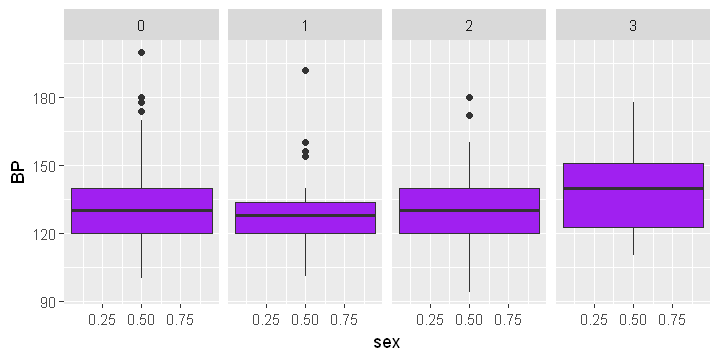

In [15]:
data %>%
  ggplot(aes(x=sex, y=trestbps))+
  geom_boxplot(fill ='purple')+
  xlab('sex')+
  ylab('BP')+
  facet_grid(~cp)

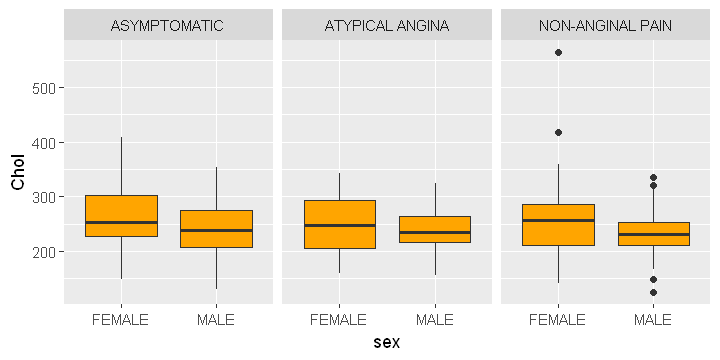

In [16]:
data2 %>%
  ggplot(aes(x=sex, y=chol))+
  geom_boxplot(fill ='orange')+
  xlab('sex')+
  ylab('Chol')+
  facet_grid(~cp)

## Correlation

In [17]:
# install.packages("corrplot")
# install.packages("ggplot2")

In [18]:
library(corrplot)
library(ggplot2)

corrplot 0.92 loaded



ï..age     trestbps    chol         thalach      oldpeak    
ï..age    1.0000000  0.27935091  0.213677957 -0.398521938  0.21001257
trestbps  0.2793509  1.00000000  0.123174207 -0.046697728  0.19321647
chol      0.2136780  0.12317421  1.000000000 -0.009939839  0.05395192
thalach  -0.3985219 -0.04669773 -0.009939839  1.000000000 -0.34418695
oldpeak   0.2100126  0.19321647  0.053951920 -0.344186948  1.00000000

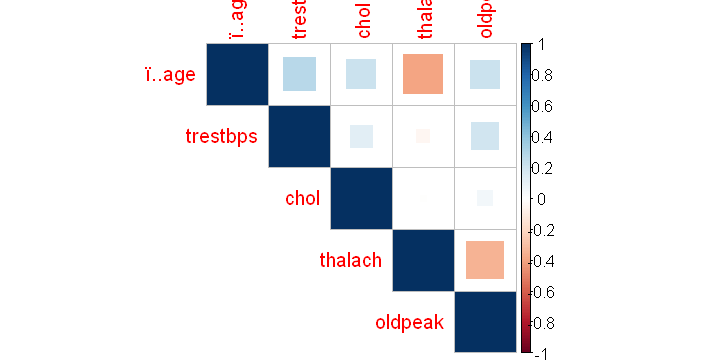

In [19]:
cor_heart <- cor(data2[, 10:14])
cor_heart

corrplot(cor_heart, method ='square', type='upper')

## Check for the null values

In [20]:
s = sum(is.na(data2))

In [21]:
s

[1] 0